<h1><b>Feature Engineering</b></h1>

[1. Encoding](#encoding)

[2. Missing Values](#missing_values)

[3. Outliers](#outliers)

[4. Imbalanced Data](#imbalanced)

<a id='encoding'></a>

<h2>1.) ENCODING</h2>

<h4>Nominal variables - Gender, State <br>
    
Ordinal variables - Education (BSc,MSc,PhD)</h4>

- Nominal
    - One Hot Encoding
    - One Hot Encoding (with many categories) - take top ten 
    - Mean Encoding
    - Count/Frequency Encoding (replace with count)
- Ordinal
    - Label Encoding 
    - Target Guided Encoding (use when there are many categories)

<h4>Ordinal Variables - Label Encoding : </h4><br>
PhD = 3 ; MSc = 2 ; BSc = 1

<h4>Ordinal Variables - Target Guided Encoding:</h4>
<p>Obtain mean for each feature wrt to the target variable, then assign rank (1,2,3) based on mean values</p>

<h4>Nominal Variables - Mean Encoding:</h4>
<p>Obtain mean for each feature wrt to the target variable, then assign mean values</p>

<h3>HIGH CARDINALITY - Categorical variable with many categories</h3>

<h4>1.) One Hot Encoding for multi-categorical features</h4>

In [2]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('mercedesbenz.csv', usecols=['X1','X2','X3','X4','X5','X6']) 

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [4]:
for col in data.columns:
    distict = len(data[col].unique())
    print('{} : {} values'.format(col,distict))

X1 : 27 values
X2 : 44 values
X3 : 7 values
X4 : 4 values
X5 : 29 values
X6 : 12 values


In [5]:
data['X2'].value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [6]:
top_10 = [element for element in data['X2'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

<h4>For each feature, obtain top ten most frequent instances and apply one-hot encoding to those, and drop the rest</h4>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      4209 non-null   object
 1   X2      4209 non-null   object
 2   X3      4209 non-null   object
 3   X4      4209 non-null   object
 4   X5      4209 non-null   object
 5   X6      4209 non-null   object
dtypes: object(6)
memory usage: 197.4+ KB


In [8]:
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [9]:
for label in top_10:
    data['X2_'+label] = np.where(data['X2']==label,1,0) 

In [10]:
def one_hot_encoder_top_10(data,column):
    
    top_10 = [features for features in data[column].value_counts().sort_values(ascending=False).head(10).index]
    
    for label in top_10:
        data[column+'_'+label] = np.where(data[column]==label,1,0)

In [11]:
one_hot_encoder_top_10(data,'X1')

In [12]:
data

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,s,as,c,d,aa,d,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,o,t,d,d,aa,h,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4206,v,r,a,d,aa,g,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4207,r,e,f,d,aa,l,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<h4>2.) One Hot Encoding</h4>

In [223]:
df = pd.read_csv('titanic_train.csv')

In [224]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [226]:
embarked_dummies = pd.get_dummies(df['Embarked'],drop_first=True) 

In [227]:
embarked_dummies.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [228]:
df = pd.concat([df,embarked_dummies],axis=1)

In [229]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [230]:
df.drop('Embarked', axis=1, inplace=True) 

In [231]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


<h4>3.) Count/Frequency Encoding</h4>

In [13]:
df = pd.read_csv('mercedesbenz.csv', usecols=['X1','X2'])  

In [14]:
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [15]:
for col in df.columns:
    print("{} : {} ".format(col,len(df[col].unique()))) 

X1 : 27 
X2 : 44 


In [16]:
df['X2'].value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'y': 11,
 'ap': 11,
 'x': 10,
 'aw': 8,
 'h': 6,
 'at': 6,
 'al': 5,
 'q': 5,
 'an': 5,
 'p': 4,
 'ah': 4,
 'av': 4,
 'au': 3,
 'o': 1,
 'am': 1,
 'l': 1,
 'c': 1,
 'af': 1,
 'ar': 1,
 'aa': 1,
 'j': 1}

In [17]:
count_map = df['X2'].value_counts().to_dict()

In [18]:
df['X2'] = df['X2'].map(count_map) 

In [19]:
df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


<h4>4.) Ordinal Encoding</h4>

In [242]:
df = pd.DataFrame([[478,'MSc'],
                   [985,'PhD'],
                   [858,'MSc'],
                   [575,'BSc'],
                   [434,'MSc'],
                   [813,'BSc']],
                  columns=['id','degree'])

In [244]:
df.head(6)

,id,degree
0,478,MSc
1,985,PhD
2,858,MSc
3,575,BSc
4,434,MSc
5,813,BSc


In [249]:
degree_dict = {'MSc': 2, 'BSc': 1, 'PhD': 3}

In [250]:
degree_dict

{'MSc': 2, 'BSc': 1, 'PhD': 3}

In [251]:
df['degree_ordinal'] = df['degree'].map(degree_dict) 

In [252]:
df.head(6)

,id,degree,degree_ordinal
0,478,MSc,2
1,985,PhD,3
2,858,MSc,2
3,575,BSc,1
4,434,MSc,2
5,813,BSc,1


<h4>5.) Target Guided Ordinal Encoding</h4><br>
- Order labels according to target <br>
- Replace labels by joint probability of being 1 or 0

In [4]:
import pandas as pd
df = pd.read_csv('titanic_train.csv', usecols=['Cabin','Survived'])

In [5]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [6]:
df['Cabin'].fillna('Missing',inplace=True) 

In [7]:
df['Cabin'].value_counts()

Missing        687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
B102             1
B71              1
E10              1
C87              1
D46              1
Name: Cabin, Length: 148, dtype: int64

In [8]:
df['Cabin'] = df['Cabin'].astype(str).str[0] 

In [9]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [10]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [11]:
gb = df.groupby(['Cabin'])['Survived'].mean()  

People in Cabin A have a 46% chance of surviving

In [12]:
gb.head(10)

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [13]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index 

In [270]:
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

Assign and iterate integers over labels based on survival probability

In [14]:
ordered_labels = {k:i for i,k in enumerate(ordinal_labels,0)}  

In [15]:
ordered_labels

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [16]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(ordered_labels) 

In [17]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


<h4>6.) Mean Encoding</h4>

In [18]:
df['Cabin_mean_encoding'] = df['Cabin'].map(df.groupby(['Cabin'])['Survived'].mean().sort_values().to_dict())

In [19]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels,Cabin_mean_encoding
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


<h4>7.) Probability Ratio Encoding</h4><br>
- Probability of survived based on cabin<br>
- Probability of not survived<br>
- Probability(survived) / Probability(not_survived)<br>
- Map cabin to new ratio feature above

In [13]:
import pandas as pd
import numpy as np 

In [5]:
df = pd.read_csv('titanic_train.csv', usecols=['Cabin','Survived']) 

In [6]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [7]:
df['Cabin'].fillna('Missing',inplace=True)  

In [8]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [14]:
cabin_unique_code = []
for i in df['Cabin'].unique():
    cabin_unique_code.append(i[0][0])
cabin_unique_code = np.unique(cabin_unique_code)

In [15]:
cabin_unique_code

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'], dtype='<U1')

In [16]:
df['Cabin'] = df['Cabin'].astype(str).str[0] 

In [17]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [20]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [22]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [23]:
prob_df = pd.DataFrame(prob_df)

In [24]:
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [25]:
prob_df['Died'] = 1-prob_df['Survived'] 

In [26]:
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [27]:
prob_df['Probability_Ratio'] = prob_df['Survived']/prob_df['Died']

In [28]:
prob_df

,Survived,Died,Probability_Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [33]:
prob_df = prob_df.reset_index()

In [34]:
prob_df.head()

,Cabin,Survived,Died,Probability_Ratio
0,A,0.466667,0.533333,0.875000
1,B,0.744681,0.255319,2.916667
2,C,0.593220,0.406780,1.458333
3,D,0.757576,0.242424,3.125000
4,E,0.750000,0.250000,3.000000


In [35]:
ratio_dict = pd.Series(prob_df.Probability_Ratio.values,index=prob_df.Cabin).to_dict()

In [36]:
ratio_dict

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [37]:
df['Cabin_encoded'] = df['Cabin'].map(ratio_dict) 

In [38]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


<a id='missing_values'></a>

<h2>2.) MISSING VALUES</h2>

<h4>Techniques to handle missing values</h4>

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

<h4>Median Imputation</h4>

In [9]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived']) 

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
 df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [13]:
median = df.Age.median()

In [14]:
median

28.0

In [15]:
impute_nan(df,'Age',median) 

In [16]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
import matplotlib.pyplot as plt

In [18]:
print('Standard Deviation - Before Imputation', df.Age.std())
print('Standard Deviation - After Imputation', df.Age_median.std())

Standard Deviation - Before Imputation 14.526497332334044
Standard Deviation - After Imputation 13.019696550973194


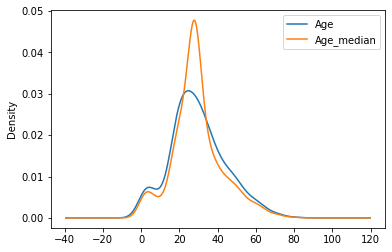

In [23]:
plt.figure()
df.Age.plot(kind='density',legend=True)
df.Age_median.plot(kind='density',legend=True)
plt.show()

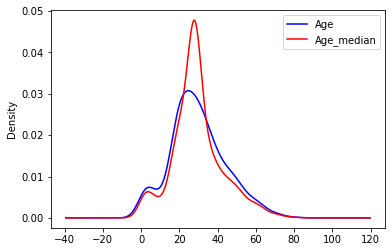

In [24]:
plt.figure()
df.Age.plot(kind='kde', color='blue', label='Age')
df.Age_median.plot(kind='kde', color='red', label='Age_median')
plt.legend()
plt.show()

<h4>Random Sample Imputation</h4><br>
Impute using random samples from the dataset 

In [25]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived']) 

In [38]:
df['Age'].dropna().sample() # Takes a random sample

212    22.0
Name: Age, dtype: float64

In [37]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) # Takes a random sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [40]:
df[df['Age'].isnull()].index # Indexes of null values

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [44]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample # Wherever null, replace with random sample

In [41]:
median = df.Age.median()

In [42]:
median

28.0

In [56]:
impute_nan(df,'Age',median) 

In [58]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


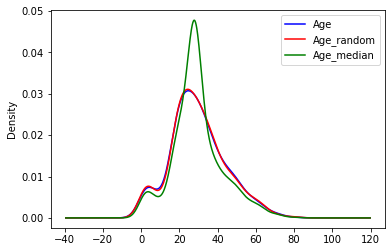

In [65]:
plt.figure()
df.Age.plot(kind='kde', color='blue', label='Age')
df.Age_random.plot(kind='kde', color='red', label='Age_random')
df.Age_median.plot(kind='kde', color='green', label='Age_median')
plt.legend()
plt.show()

<h4>This is a better imputation since minimal distortion occured</h4>

<h3>loc vs iloc</h3>

In [47]:
s = pd.Series(list("abcdef"), index=[49, 48, 47, 0, 1, 2]) 

In [48]:
s.loc[0]    # value at index label 0

'd'

In [53]:
s.loc[47]   # value at index label 47

'c'

In [55]:
s.iloc[0]   # value at index location 0

'a'

In [51]:
s.loc[0:1]  # rows at index labels between 0 and 1 (inclusive)

0    d
1    e
dtype: object

In [52]:
s.iloc[0:1] # rows at index location between 0 and 1 (exclusive)

49    a
dtype: object

<h4>Replacing nulls with a new feature</h4><br>
Works well if the data is not missing completely at random 

In [66]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived']) 

In [67]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0) 

In [70]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


<h4>End of distribution impution</h4><br>
Use when data is not missing at random

In [125]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived']) 

Text(0.5, 0, 'Age')

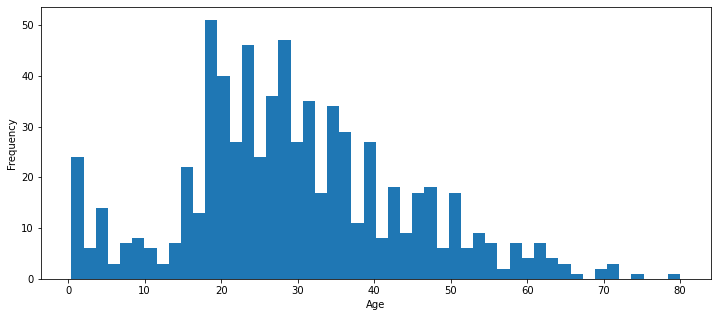

In [126]:
plt.figure(figsize=(12,5))
#df['Age'].hist(bins=50)
df.Age.plot(kind='hist', bins=50)
plt.xlabel('Age')

In [127]:
extreme = df.Age.mean()+(3*df.Age.std()) 

<p>Normal Distribution - 3x standard deviation from mean</p>
<img src="standard-normal-distribution-with-probabilities.png" width="500" height="600">

In [90]:
import seaborn as sns

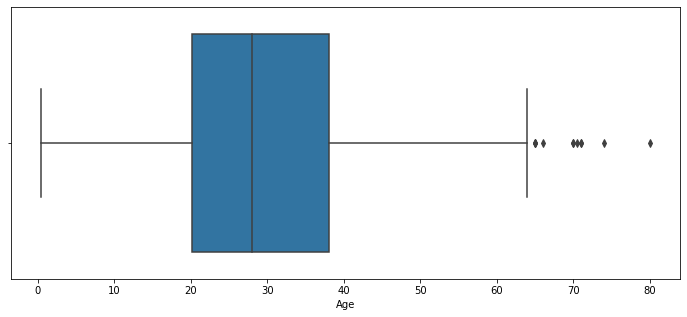

In [142]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df.Age,data=df)

In [131]:
df.Age.isnull().sum()

177

In [132]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_median'] = df[variable].fillna(median) 
    df[variable+'_end_distribution'] = df[variable].fillna(extreme) 

In [133]:
impute_nan(df,'Age',df.Age.median(),extreme)  

In [134]:
df.head(10) 

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
5,0,NaN,8.4583,28.0,73.27861
6,0,54.0,51.8625,54.0,54.00000
7,0,2.0,21.0750,2.0,2.00000
8,1,27.0,11.1333,27.0,27.00000
9,1,14.0,30.0708,14.0,14.00000


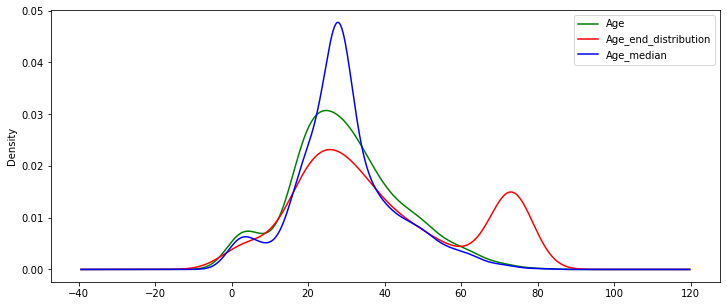

In [141]:
plt.figure(figsize=(12,5))
df.Age.plot(kind='kde', legend='Age', color='green')
df.Age_end_distribution.plot(kind='kde', legend='Age_end_distribution', color='red')
df.Age_median.plot(kind='kde', legend='Age_median', color='blue')

<h3>Categorical Missing Values</h3>

<h4>Frequent category imputation</h4><br>

In [146]:
df = pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [147]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [157]:
df.isnull().sum().sort_values(ascending=False)

FireplaceQu    690
GarageType      81
BsmtQual        37
SalePrice        0
dtype: int64

Since BsmtQual and GarageType have minimal missing values, we can replace with most frequent category

In [163]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [159]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [165]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [170]:
def impute_nan(df,variable):
    most_frequent_cat = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_cat, inplace=True) 

In [176]:
for feature in df.isnull().sum().sort_values(ascending=False).index[:3]:
    impute_nan(df,str(feature)) 

In [177]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [192]:
df['GarageType'].mode()[0]

'Attchd'

<h4>Adding a new feature to capture nulls</h4><br>
This works when a column has many missing values - FireplaceQu. Fill using 1's and 0's or 'Missing'

In [179]:
df = pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [181]:
df.isnull().sum().sort_values(ascending=False)

FireplaceQu    690
GarageType      81
BsmtQual        37
SalePrice        0
dtype: int64

In [190]:
for feature in df.columns[:3]:
    df[feature+'_bool'] = np.where(df[feature].isnull(),1,0) 

In [191]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_bool,FireplaceQu_bool,GarageType_bool
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [207]:
df = pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [208]:
for feature in df.columns[:3]:
    df[feature+'_bool'] = np.where(df[feature].isnull(),1,0) 
    df[feature].fillna(df[feature].mode()[0],inplace=True) 

In [211]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_bool,FireplaceQu_bool,GarageType_bool
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [212]:
df = pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [213]:
for feature in df.columns[:3]:
    df[feature+'_bool'] = np.where(df[feature].isnull(),1,0) 
    df[feature] = np.where(df[feature].isnull(),'Missing',df[feature])  

In [214]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_bool,FireplaceQu_bool,GarageType_bool
0,Gd,Missing,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


<a id='outliers'></a>

<h2>3.) OUTLIERS</h2><br>
- Fraud detection, keep outliers<br>
- Sales forecasting, keep outliers

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import seaborn as sns

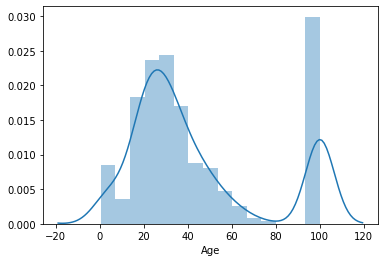

In [6]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'Number of Passengers')

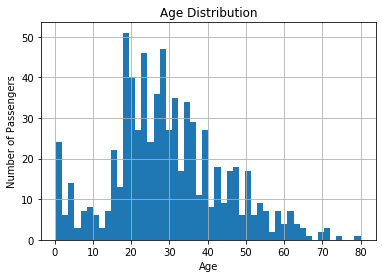

In [7]:
figure = df.Age.hist(bins=50)
figure.set_title('Age Distribution')
figure.set_xlabel('Age')
figure.set_ylabel('Number of Passengers')

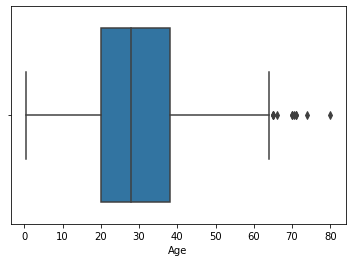

In [8]:
sns.boxplot(x='Age',data=df)

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<b>Assuming age follows a Gaussian Distribution, calculate the boundaries which differentiates the outliers</b>

In [28]:
# 3* -> extreme outliers (99.7%) 
upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std() 
print(upper_boundary)
print(lower_boundary)
print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


<b>Calculate IQR (Anything outside may be an outlier)</b>

In [14]:
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25) 

In [15]:
IQR

17.875

In [18]:
lower_bridge = df['Age'].quantile(0.25)-(IQR*1.5) 
upper_bridge = df['Age'].quantile(0.75)+(IQR*1.5) 
print(lower_bridge)
print(upper_bridge)

# For extreme outliers -> IQR*3

-6.6875
64.8125


<b>Feature is skewed</b>

Text(0, 0.5, 'Number of Passengers')

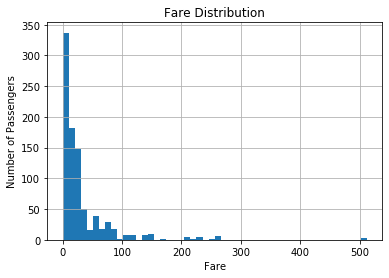

In [19]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of Passengers')

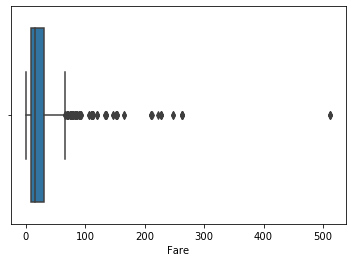

In [20]:
sns.boxplot(x='Fare',data=df)

In [21]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25) 

In [23]:
IQR

23.0896

In [24]:
lower_bridge = df['Fare'].quantile(0.25)-(IQR*1.5) 
upper_bridge = df['Fare'].quantile(0.75)+(IQR*1.5) 
print(lower_bridge)
print(upper_bridge) 

-26.724
65.6344


In [26]:
# Extreme Outlier
lower_bridge = df['Fare'].quantile(0.25)-(IQR*3) 
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3) 
print(lower_bridge)
print(upper_bridge) 

-61.358399999999996
100.2688


In [31]:
data = df.copy()

In [32]:
data.loc[data['Age']>=73,'Age'] = 73
data.loc[data['Fare']>=100,'Fare'] = 100

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Number of Passengers')

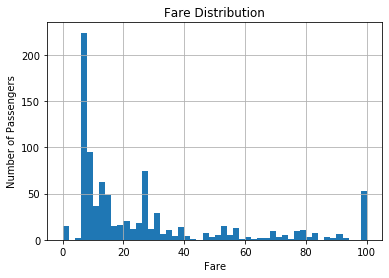

In [35]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of Passengers')

<a id='imbalanced'></a>

<h2>4.) IMBALANCED DATA</h2><br>

In [36]:
df = pd.read_csv('creditcard.csv')

In [37]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [39]:
X = df.drop('Class',axis=1)
y = df.Class

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

<b>Attempt Logistic Regression with cross-validation and hyperparameter tuning without resampling</b>

In [42]:
10.0 ** np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [44]:
log_reg = LogisticRegression()
grid = {
          "C" : 10.0 ** np.arange(-2,3),
          "penalty" : ['l1','l2'] 
       }
cv = KFold(n_splits=5, shuffle=False) 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7) 

In [47]:
clf = GridSearchCV(log_reg,grid,cv=cv,n_jobs=-1,scoring='f1_macro') 
clf.fit(X_train,y_train) 

C:\Users\f5021308\AnacondaNew\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [48]:
y_pred = clf.predict(X_test) 

In [49]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [51]:
print(confusion_matrix(y_test,y_pred), '\n')
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[85249    48]
 [   50    96]] 

0.9988530365272755
0.8284857534856852


<b>Attempt Random Forest with adjusted class weights without resampling</b>

In [54]:
class_weight = dict({0:1,1:100}) # Give more importance to '1'

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight=class_weight)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test) 

In [56]:
print(confusion_matrix(y_test,y_pred), '\n')
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[85294     3]
 [   45   101]] 

0.9994382219725431
0.8458728253462799


<b>Under Sampling</b>

In [59]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [58]:
y_train.value_counts()

0    199018
1       346
Name: Class, dtype: int64

In [60]:
ns = NearMiss(0.8) # 346/0.8
X_train_ns,y_train_ns = ns.fit_sample(X_train,y_train) 
print('Before resample: ' , Counter(y_train))
print('After resample: ' , Counter(y_train_ns)) 

C:\Users\f5021308\AnacondaNew\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Before resample:  Counter({0: 199018, 1: 346})
After resample:  Counter({0: 432, 1: 346})


In [64]:
0.8 * 432

345.6

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_ns,y_train_ns)
y_pred = rfc.predict(X_test) 

In [66]:
print(confusion_matrix(y_test,y_pred), '\n')
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[69578 15719]
 [    7   139]] 

0.8159474737544328
0.883884648980733


<b>Over Sampling</b>

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [70]:
os = RandomOverSampler(0.5) 
X_train_os,y_train_os = os.fit_sample(X_train,y_train) 
print('Before resample: ' , Counter(y_train))
print('After resample: ' , Counter(y_train_os)) 

C:\Users\f5021308\AnacondaNew\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Before resample:  Counter({0: 199018, 1: 346})
After resample:  Counter({0: 199018, 1: 99509})


In [74]:
199018/2 # 199018/2 (0.5)

99509.0

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_os,y_train_os)
y_pred = rfc.predict(X_test) 

In [76]:
print(confusion_matrix(y_test,y_pred), '\n')
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[85293     4]
 [   37   109]] 

0.9995201479348805
0.873264223749378


<b>SMOTETomek</b>

In [77]:
from imblearn.combine import SMOTETomek

In [78]:
sm = SMOTETomek(0.5)
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train) 
print('Before resample: ' , Counter(y_train))
print('After resample: ' , Counter(y_train_sm)) 

C:\Users\f5021308\AnacondaNew\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Before resample:  Counter({0: 199018, 1: 346})
After resample:  Counter({0: 198127, 1: 98618})


In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_sm,y_train_sm)
y_pred = rfc.predict(X_test) 

In [80]:
print(confusion_matrix(y_test,y_pred), '\n')
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[85275    22]
 [   23   123]] 

0.9994733330992591
0.9211039155530851
